<a href="https://colab.research.google.com/github/ayodelenaomii/Iris-Flower/blob/main/Housing_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv ('/content/drive/MyDrive/Machine Learning Data/housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [4]:
df.shape


(50000, 6)

In [5]:



df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [6]:

df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [7]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt  Price
0           False     False      False         False      False  False
1           False     False      False         False      False  False
2           False     False      False         False      False  False
3           False     False      False         False      False  False
4           False     False      False         False      False  False
...           ...       ...        ...           ...        ...    ...
49995       False     False      False         False      False  False
49996       False     False      False         False      False  False
49997       False     False      False         False      False  False
49998       False     False      False         False      False  False
49999       False     False      False         False      False  False

[50000 rows x 6 columns]>

In [8]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [9]:

df_dummies = pd.get_dummies(df, columns=['Neighborhood'])

print(df_dummies)

       SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price  \
0            2126         4          1       1969  215355.283618   
1            2459         3          2       1980  195014.221626   
2            1860         2          1       1970  306891.012076   
3            2294         2          1       1996  206786.787153   
4            2130         5          2       2001  272436.239065   
...           ...       ...        ...        ...            ...   
49995        1282         5          3       1975  100080.865895   
49996        2854         2          2       1988  374507.656727   
49997        2979         5          3       1962  384110.555590   
49998        2596         5          2       1984  380512.685957   
49999        1572         5          3       2011  221618.583218   

       Neighborhood_Rural  Neighborhood_Suburb  Neighborhood_Urban  
0                       1                    0                   0  
1                       1                    

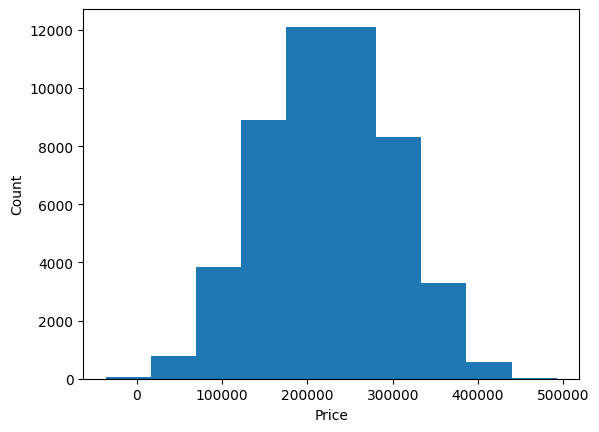

In [10]:
plt.hist(df['Price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

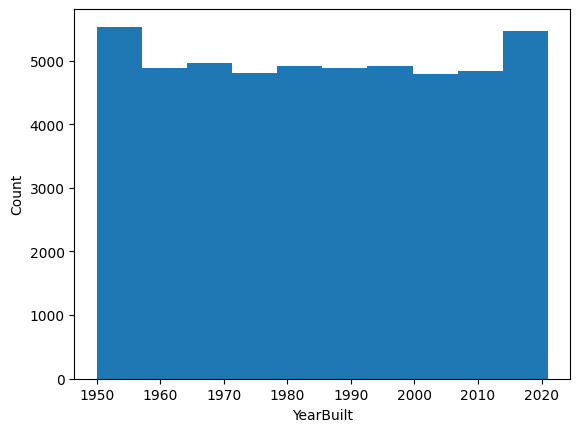

In [11]:
plt.hist(df['YearBuilt'])
plt.xlabel('YearBuilt')
plt.ylabel('Count')
plt.show()

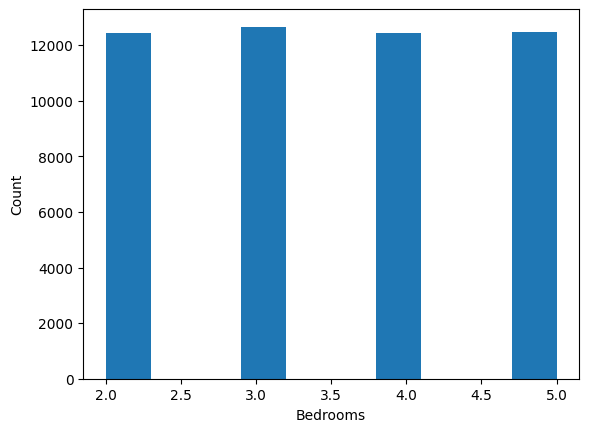

In [12]:
plt.hist(df['Bedrooms'])
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

In [13]:
df = pd.DataFrame({'x': df_dummies['SquareFeet'], 'y': df_dummies['Price']})
corr = df.corr()

print(corr['x']['y'])

0.7507197856708843


In [14]:
 df_dummies

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,1,0,0
49996,2854,2,2,1988,374507.656727,0,1,0
49997,2979,5,3,1962,384110.555590,0,1,0
49998,2596,5,2,1984,380512.685957,1,0,0


<Axes: >

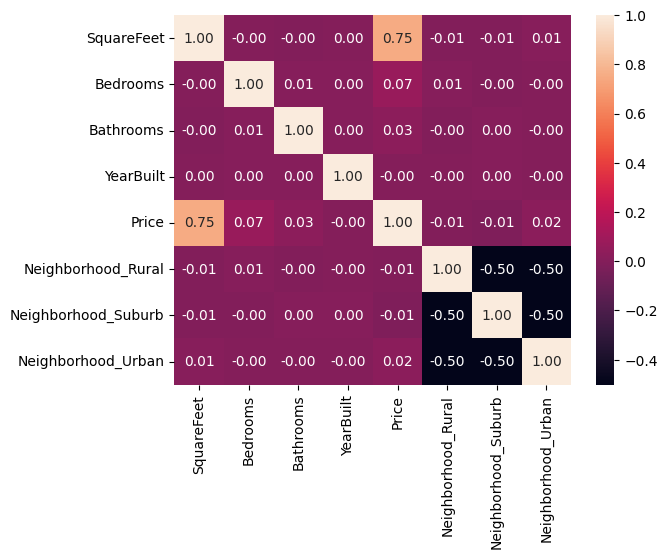

In [15]:
sns.heatmap(df_dummies.corr(method='pearson'), annot=True, fmt=".2f")

In [16]:
inputs = df_dummies.drop('Price', axis=1)
target = df_dummies['Price']



In [17]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25)

In [18]:
X_train

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
12263,2892,4,3,1953,0,1,0
7923,1606,2,3,1987,0,0,1
2372,2153,2,1,1979,0,0,1
36568,2142,2,1,2003,0,0,1
38286,1417,5,3,1999,1,0,0
...,...,...,...,...,...,...,...
31330,2127,3,2,2020,0,1,0
1494,1288,2,1,1975,0,0,1
19551,2976,3,2,1962,0,1,0
2909,2963,5,3,2020,0,0,1


In [34]:
import keras
from keras.callbacks import EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(patience=10)

In [51]:
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model.
model = Sequential()

# Add a dense layer with 10 units.
model.add(Dense(10, activation='relu'))

# Add a dense layer with 1 unit.
model.add(Dense(1, activation='sigmoid'))

# Compile the model.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model.
model.fit(X_train, y_train, epochs=10)

# Evaluate the model.
loss, accuracy = model.evaluate(X_test, y_test)

# Print the loss and accuracy.
print(loss, accuracy)

accuracy = round(accuracy, 2)


Epoch 1/10
1172/1172 [==============================] - 3s 2ms/step - loss: -3552058368.0000 - accuracy: 0.0000e+00
Epoch 2/10
1172/1172 [==============================] - 2s 2ms/step - loss: -25143138304.0000 - accuracy: 0.0000e+00
Epoch 3/10
1172/1172 [==============================] - 2s 2ms/step - loss: -65258414080.0000 - accuracy: 0.0000e+00
Epoch 4/10
1172/1172 [==============================] - 2s 2ms/step - loss: -119331790848.0000 - accuracy: 0.0000e+00
Epoch 5/10
1172/1172 [==============================] - 3s 3ms/step - loss: -185656279040.0000 - accuracy: 0.0000e+00
Epoch 6/10
1172/1172 [==============================] - 6s 5ms/step - loss: -263662485504.0000 - accuracy: 0.0000e+00
Epoch 7/10
1172/1172 [==============================] - 2s 2ms/step - loss: -353022476288.0000 - accuracy: 0.0000e+00
Epoch 8/10
1172/1172 [==============================] - 2s 2ms/step - loss: -453576818688.0000 - accuracy: 0.0000e+00
Epoch 9/10
1172/1172 [==============================] - 2s 2

RuntimeError: ignored

In [41]:
score = model.score(X_test, y_test)

AttributeError: ignored

In [42]:
y_pred = model.predict(X_test)


391/391 [==============================] - 1s 2ms/step


In [43]:
y_true = model.predict(X_train)

1172/1172 [==============================] - 2s 1ms/step


In [44]:
score

0.5664801176918426